<a href="https://colab.research.google.com/github/protontypes/osta/blob/main/packages_insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyalex semanticscholar habanero itables

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import requests
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import pyalex
pyalex.config.email = "ly0@protonmail.com"
from habanero import counts

from semanticscholar import SemanticScholar
sch = SemanticScholar()

URL = "https://ost.ecosyste.ms/api/v1/projects/packages"
FILE_TO_SAVE_AS = "ecosystems_downloads.json" # the name you want to save file as


resp = requests.get(URL) # making requests to server

with open(FILE_TO_SAVE_AS, "wb") as f: # opening a file handler to create new file
    f.write(resp.content) # writing content to file

In [3]:
df = pd.read_json(resp.content.decode())

In [4]:
df.head(30)

,id,name,description,url,last_synced_at,repository,owner,packages,commits,issues_stats,events,keywords,dependencies,score,created_at,updated_at,avatar_url,language,category,sub_category,monthly_downloads,readme,funding_links,readme_doi_urls,works,citation_counts,total_citations,keywords_from_contributors,project_url,html_url
0,9458,xarray,An open source project and Python package that...,https://github.com/pydata/xarray,2025-04-05 04:39:35.010000+00:00,"{'id': 10920764, 'uuid': '13221727', 'full_nam...","{'login': 'pydata', 'name': 'Python for Data',...","[{'id': 76568, 'name': 'py-xarray', 'ecosystem...","{'full_name': 'pydata/xarray', 'default_branch...","{'full_name': 'pydata/xarray', 'html_url': 'ht...","{'total': {'CreateEvent': 23, 'ReleaseEvent': ...","[dask, netcdf, numpy, pandas, python, xarray]","[{'ecosystem': 'actions', 'filepath': '.github...",31.879959,2023-09-11 14:36:19.560000+00:00,2025-04-05 04:39:35.027000+00:00,https://github.com/pydata.png,Python,Climate Change,Climate Data Standards,7892147,# xarray: N-D labeled arrays and datasets\n\n[...,"[https://github.com/sponsors/numfocus, https:/...",[https://doi.org/10.5281/zenodo.11183201],{},{},0,"[pydata, closember, alignment, flexible, clima...",https://ost.ecosyste.ms/api/v1/projects/9458,https://ost.ecosyste.ms/projects/9458
1,20618,netcdf-python,The Unidata network Common Data Form (netCDF) ...,https://github.com/Unidata/netcdf4-python,2025-04-05 04:09:25.491000+00:00,"{'id': 13200625, 'uuid': '15884459', 'full_nam...","{'login': 'Unidata', 'name': 'NSF Unidata', 'u...","[{'id': 75750, 'name': 'py-netcdf4', 'ecosyste...","{'full_name': 'Unidata/netcdf4-python', 'defau...","{'full_name': 'Unidata/netcdf4-python', 'html_...","{'total': {'IssuesEvent': 25, 'WatchEvent': 24...","[netcdf, netcdf4, python]","[{'ecosystem': 'actions', 'filepath': '.github...",25.811016,2023-09-11 14:52:14.006000+00:00,2025-04-05 04:09:25.547000+00:00,https://github.com/Unidata.png,Cython,Climate Change,Climate Data Standards,1886377,To update web docs at http://github.unidata.io...,[],[],{},{},0,"[closember, cf-conventions, qt, netcdftime, gt...",https://ost.ecosyste.ms/api/v1/projects/20618,https://ost.ecosyste.ms/projects/20618
2,903,h5netcdf,A Python interface for the netCDF4 file format...,https://github.com/h5netcdf/h5netcdf,2025-04-05 03:03:42.988000+00:00,"{'id': 30013337, 'uuid': '33561533', 'full_nam...","{'login': 'h5netcdf', 'name': 'h5netcdf', 'uui...","[{'id': 75447, 'name': 'py-h5netcdf', 'ecosyst...","{'full_name': 'h5netcdf/h5netcdf', 'default_br...","{'full_name': 'h5netcdf/h5netcdf', 'html_url':...","{'total': {'CreateEvent': 4, 'ReleaseEvent': 4...","[h5py, hdf5, netcdf, python]","[{'ecosystem': 'actions', 'filepath': '.github...",22.622721,2023-09-11 11:54:36.292000+00:00,2025-04-05 03:03:42.993000+00:00,https://github.com/h5netcdf.png,Python,Climate Change,Climate Data Standards,1255623,h5netcdf\n========\n\n.. image:: https://githu...,[],[],{},{},0,"[pydata, closember, measur, archiving, qt, fis...",https://ost.ecosyste.ms/api/v1/projects/903,https://ost.ecosyste.ms/projects/903
3,19753,pvlib-python,A set of documented functions for simulating t...,https://github.com/pvlib/pvlib-python,2025-04-05 04:35:00.359000+00:00,"{'id': 27418229, 'uuid': '30895522', 'full_nam...","{'login': 'pvlib', 'name': 'pvlib', 'uuid': '1...","[{'id': 2863691, 'name': 'pvlib', 'ecosystem':...","{'full_name': 'pvlib/pvlib-python', 'default_b...","{'full_name': 'pvlib/pvlib-python', 'html_url'...","{'total': {'CreateEvent': 3, 'ReleaseEvent': 2...","[photovoltaic, python, renewable-energy, renew...","[{'ecosystem': 'actions', 'filepath': '.github...",25.720298,2023-09-11 14:52:06.879000+00:00,2025-04-05 04:35:00.368000+00:00,https://github.com/pvlib.png,Python,Renewable Energy,Photovoltaics and Solar Energy,478790,"<img src=""docs/sphinx/source/_images/pvlib_log...",[],"[https://doi.org/10.5281/zenodo.593284, https:...",{'https://doi.org/10.5281/zenodo.593284': None...,{'https://doi.

In [5]:
df.iloc[1]["packages"][0] # GO packages do not provide montly download numbers. That's why we had to kick out kube-green

{'id': 75750,
 'name': 'py-netcdf4',
 'ecosystem': 'spack',
 'description': 'Python interface to the netCDF Library.\n',
 'homepage': 'https://github.com/Unidata/netcdf4-python',
 'licenses': '[]',
 'normalized_licenses': ['Other'],
 'repository_url': 'https://github.com/Unidata/netcdf4-python',
 'keywords_array': [],
 'namespace': None,
 'versions_count': 9,
 'first_release_published_at': '2022-04-05T09:26:25.143Z',
 'latest_release_published_at': '2025-01-11T10:19:10.638Z',
 'latest_release_number': '1.7.2',
 'last_synced_at': '2025-04-04T03:35:05.484Z',
 'created_at': '2022-04-05T09:26:25.117Z',
 'updated_at': '2025-04-04T03:35:05.485Z',
 'registry_url': 'https://packages.spack.io/package.html?name=py-netcdf4',
 'install_command': 'spack install py-netcdf4',
 'documentation_url': None,
 'metadata': {},
 'repo_metadata': {'uuid': '15884459',
  'full_name': 'Unidata/netcdf4-python',
  'owner': 'Unidata',
  'description': 'netcdf4-python: python/numpy interface to the netCDF C library'

In [6]:
names = []
download_counts = []
url = []
description = []
category = []
sub_category = []
language = []
docker_downloads = []
doi = []
citations = []

for index, row in df.iterrows():
    names.append(row['name'])
    package_downloads = 0
    docker_download_count = 0
    for package_manager in range(len(row['packages'])):
        if row['packages'][package_manager]['downloads']:
            if row['packages'][package_manager]['downloads_period'] == "last-month":
                package_downloads += row['packages'][package_manager]['downloads']
        if row['packages'][package_manager]['docker_downloads_count']:
            docker_download_count = row['packages'][package_manager]['docker_downloads_count']
        else:
            docker_download_count = 0
    download_counts.append(package_downloads)
    docker_downloads.append(docker_download_count)
    url.append(row['url'])
    description.append(row['description'])
    category.append(row['category'])
    sub_category.append(row['sub_category'])
    language.append(row['language'])
    citations.append(row['total_citations'])


In [7]:
df_extract = pd.DataFrame()
df_extract['project_names'] = names
df_extract['download_counts'] = download_counts
df_extract['git_url'] = url
df_extract['description'] = description
df_extract['category'] = category
df_extract['sub_category'] = sub_category
df_extract['language'] = language
df_extract['docker_downloads'] = docker_downloads
df_extract['citations'] = citations
df_extract.head(200)


,project_names,download_counts,git_url,description,category,sub_category,language,docker_downloads,citations
0,xarray,7892147,https://github.com/pydata/xarray,An open source project and Python package that...,Climate Change,Climate Data Standards,Python,0,0
1,netcdf-python,1886377,https://github.com/Unidata/netcdf4-python,The Unidata network Common Data Form (netCDF) ...,Climate Change,Climate Data Standards,Cython,0,0
2,h5netcdf,1255623,https://github.com/h5netcdf/h5netcdf,A Python interface for the netCDF4 file format...,Climate Change,Climate Data Standards,Python,0,0
3,pvlib-python,478790,https://github.com/pvlib/pvlib-python,A set of documented functions for simulating t...,Renewable Energy,Photovoltaics and Solar Energy,Python,0,475
4,Meteostat Python,397121,https://github.com/meteostat/meteostat-python,Access and analyze historical weather and clim...,Climate Change,Climate Data Access and Visualization,Python,138,0
5,entsoe-py,268398,https://github.com/EnergieID/entsoe-py,A Python client for the ENTSO-E API (European ...,Energy Systems,Energy Data Accessibility and Integration,Python,0,0
6,origin,241605,https://github.com/energywebfoundation/origin,A set of toolkits that together provide a syst...,Energy Systems,Energy Markets,TypeScript,0,0
7,cfgrib,218770,https://github.com/ecmwf/cfgrib,A Python interface to map GRIB files to the Ne...,Climate Change,Climate Data Processing and Analysis,Python,0,0
8,Py-ART,203449,https://github.com/arm-doe/pyart,A data model driven interactive toolkit for wo...,Atmosphere,Meteorological Observation and Forecast,Python,1117,0
9,warbleR,183698,https://github.com/marce10/warbler,Is intended to facilitate the analysis of the ...,Biosphere,Bioacoustics and Acoustic Data Analysis,R,0,0


In [8]:
df_extract.loc[df['language'] == 'Julia']

,project_names,download_counts,git_url,description,category,sub_category,language,docker_downloads,citations
271,Ribasim,1273,https://github.com/Deltares/Ribasim,"A water resources model, designed to be the re...",Natural Resources,Water Supply and Quality,Julia,0,0
427,Oceananigans.jl,0,https://github.com/clima/oceananigans.jl,Fast and friendly fluid dynamics on CPUs and G...,Hydrosphere,Ocean Models,Julia,0,25
528,PowerModels.jl,0,https://github.com/lanl-ansi/PowerModels.jl,Designed to enable computational evaluation of...,Energy Systems,Grid Analysis and Planning,Julia,0,0
708,InfrastructureSystems.jl,0,https://github.com/NREL-Sienna/InfrastructureS...,Provides utilities to support data models for ...,Energy Systems,Grid Management and Microgrid,Julia,0,0
722,PowerSystems.jl,0,https://github.com/nrel-sienna/powersystems.jl,Provides a rigorous data model using Julia str...,Energy Systems,Energy System Modeling Frameworks,Julia,0,15
746,SpineOpt.jl,0,https://github.com/spine-tools/SpineOpt.jl,A highly adaptable modelling framework for mul...,Energy Systems,Energy System Modeling Frameworks,Julia,0,0
755,PowerSimulations.jl,0,https://github.com/NREL-Sienna/PowerSimulation...,A Julia package for power system modeling and ...,Energy Systems,Energy System Modeling Frameworks,Julia,0,0
758,RRTMGP.jl,0,https://github.com/CliMA/RRTMGP.jl,A Julia implementation of Rapid and accurate R...,Atmosphere,Radiative Transfer,Julia,0,0
763,SpeciesDistributionToolkit,0,https://github.com/PoisotLab/SpeciesDistributi...,A collection of Julia packages forming a toolk...,Biosphere,Species Distribution Modeling,Julia,0,0
766,Wflow,0,https://github.com/deltares/wflow.jl,A Julia package that provides a hydrological m...,Hydrosphere,Freshwater and Hydrology,Julia,0,0


In [9]:
import textwrap

def text_to_link(project_name, git_url):
    return '<a href="' + git_url + '" target="_blank" style = "color: black">' + str(project_name) + "</a>"

def text_to_bolt(topic):
    return "<b>" + topic + "</b>"

def line_break_text(text):
    wrapped_text = '<br>'.join(textwrap.wrap(text, 64))
    return wrapped_text

df_extract["description"] = df_extract.apply(
    lambda x: line_break_text(x.description), axis=1
)


df_extract["project_names"] = df_extract.apply(
    lambda x: text_to_link(x.project_names, x.git_url), axis=1
)
df_extract

,project_names,download_counts,git_url,description,category,sub_category,language,docker_downloads,citations
0,"<a href=""https://github.com/pydata/xarray"" tar...",7892147,https://github.com/pydata/xarray,An open source project and Python package that...,Climate Change,Climate Data Standards,Python,0,0
1,"<a href=""https://github.com/Unidata/netcdf4-py...",1886377,https://github.com/Unidata/netcdf4-python,The Unidata network Common Data Form (netCDF) ...,Climate Change,Climate Data Standards,Cython,0,0
2,"<a href=""https://github.com/h5netcdf/h5netcdf""...",1255623,https://github.com/h5netcdf/h5netcdf,A Python interface for the netCDF4 file format...,Climate Change,Climate Data Standards,Python,0,0
3,"<a href=""https://github.com/pvlib/pvlib-python...",478790,https://github.com/pvlib/pvlib-python,A set of documented functions for simulating t...,Renewable Energy,Photovoltaics and Solar Energy,Python,0,475
4,"<a href=""https://github.com/meteostat/meteosta...",397121,https://github.com/meteostat/meteostat-python,Access and analyze historical weather and clim...,Climate Change,Climate Data Access and Visualization,Python,138,0
...,...,...,...,...,...,...,...,...,...
967,"<a href=""https://github.com/UMN-Hydro/GSFLOW-G...",0,https://github.com/UMN-Hydro/GSFLOW-GRASS,Generates inputs for and runs the coupled grou...,Natural Resources,Water Supply and Quality,Python,0,0
968,"<a href=""https://github.com/SoilBGC-Datashare/...",0,https://github.com/SoilBGC-Datashare/sidb,Contains information on laboratory soil incuba...,Natural Resources,Soil and Land,R,0,1
969,"<a href=""https://github.com/DrylandEcology/SOI...",0,https://github.com/DrylandEcology/SOILWAT2,An ecosystem water balance simulation model.,Hydrosphere,Freshwater and Hydrology,C,0,0
970,"<a href=""https://github.com/VeinsOfTheEarth/ra...",0,https://github.com/VeinsOfTheEarth/rabpro,Delineating watershed basins and computing att...,Hydrosphere,Freshwater and Hydrology,Python,0,1135


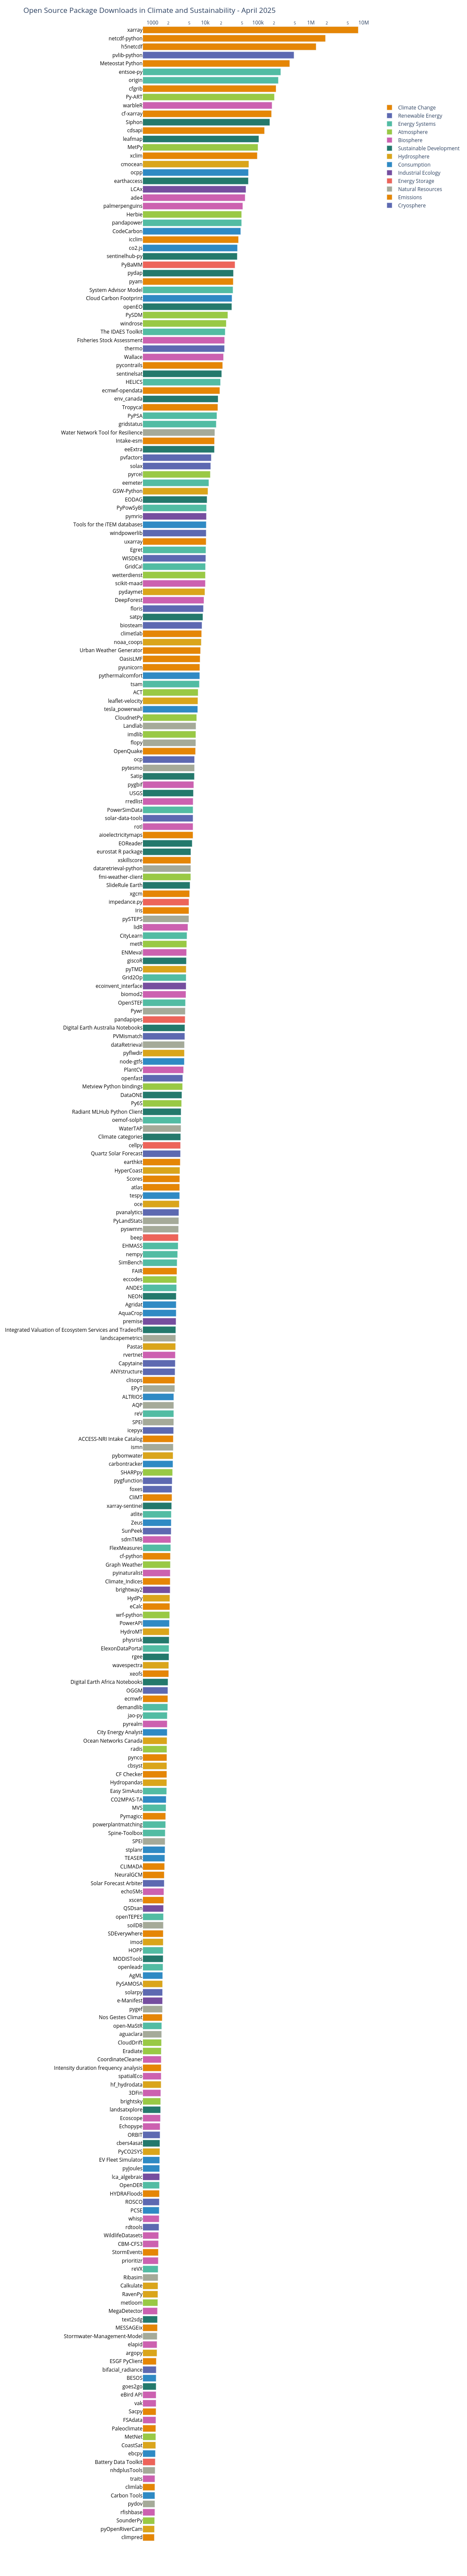

In [19]:
import numpy as np
import pandas as pd
import plotly.io as pio
import plotly.graph_objects as go
import plotly.express as px
from datetime import datetime

# Get the current date
current_date = datetime.now()

# Format the date to display the full month and year
month_year = current_date.strftime("%B %Y")


#df_extract = df_extract[df_extract["category"] == "Renewable Energy"]

number_of_projects_to_show = 300
top_downloaders = df_extract.nlargest(number_of_projects_to_show, "download_counts")
top_downloaders.index.name = "ranking"
color_discrete_sequence = px.colors.qualitative.Vivid
fig = px.bar(
    top_downloaders,
    x=top_downloaders["download_counts"],
    y=top_downloaders["project_names"],
    custom_data=["project_names", "download_counts", "docker_downloads", "git_url", "description","category","sub_category","language",top_downloaders.index+1],
    orientation="h",
    color = 'category',
    color_discrete_sequence=color_discrete_sequence,
)

fig.update_layout(
    height=number_of_projects_to_show*20,  # Added parameter
    #width=700,
    xaxis_title="",
    yaxis_title=None,
    title="Open Source Package Downloads in Climate and Sustainability - "+month_year,
    dragmode=False,
)

fig.update_layout(hovermode="y unified",hoverdistance=1000)

fig.update_traces(
    hovertemplate="<extra></extra>"+"<br>".join(
        [
            "Ranking: <b>%{customdata[8]}</b>",
            "Description: <b>%{customdata[4]}</b>",
            "Sub Category: <b>%{customdata[6]}</b>",
            "Language: <b>%{customdata[7]}</b>",
            "Downloads per month: <b>%{customdata[1]}</b>",
            #"Docker Downloads: <b>%{customdata[2]}</b>",
            "Category: <b>%{customdata[5]}</b>",

        ]
    )

)

#fig.update(layout_showlegend=False)

fig.update_layout(modebar=dict(bgcolor="rgba(0,0,0,0)"))

config = {
  'toImageButtonOptions': {
    'format': 'png', # one of png, svg, jpeg, webp
  },
  'responsive':'true'
}
fig.update_layout(
    plot_bgcolor='white'
)

fig.update_layout(modebar_color="#009485", modebar_activecolor="#2563eb")
fig["layout"]["yaxis"]["autorange"] = "reversed"

fig.update_layout(
    legend=dict(
        x=1.05,  # push to the right
        y=0.97,
        xanchor='left',
        yanchor='top'
    ),
)

fig.update_xaxes(showspikes=False)  # <-- add this line
fig.update_yaxes(showspikes=False)  # <-- add this line
#fig.update_layout(paper_bgcolor = "rgba(0,0,0,0)",
#                  plot_bgcolor = "rgba(0,0,0,0)")

#fig.update_layout(barmode='stack', xaxis={'categoryorder':'total ascending'})
fig.update_layout(xaxis_type = "log",yaxis_categoryorder = 'total descending',legend_title=None, xaxis={'side': 'top'}, )
fig.update_layout(
    legend=dict(
        bgcolor='rgba(0,0,0,0)'  # fully transparent
    )
)
pio.write_html(fig,"download_plot.html")
pio.write_json(fig,"download_plot.json")

fig.show()


/home/cy0/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning:

Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.




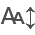

project_names  download_counts                                            git_url                                        description                 category                                    sub_category          language  docker_downloads  citations
3    <a href="https://github.com/pvlib/pvlib-python...           478790              https://github.com/pvlib/pvlib-python  A set of documented functions for simulating t...         Renewable Energy                  Photovoltaics and Solar Energy            Python                 0        475
17   <a href="https://github.com/ouranosinc/xclim" ...            96444                https://github.com/ouranosinc/xclim  A library of derived climate variables, i.e. c...           Climate Change            Climate Data Processing and Analysis            Python                 0          2
23   <a href="https://github.com/blaylockbk/Herbie"...            48709               https://github.com/blaylockbk/Herbie  A python package that downloads recent and arc...               Atmosphere         Meteorological Observation and Forecast            Python                 0         77
29   <a href="https://github.com/pybamm-team/pybamm...            36497              https://github.com/pybamm-team/pybamm  Fast and flexible physics-based battery models...           Energy Storage                                         Battery            Python                 0        102
31   <a href="https://github.com/iamconsortium/pyam...            33801              https://github.com/iamconsortium/pyam  A Python package for data-wrangling, analysis ...           Climate Change        Integrated Assessment and Climate Policy            Python                 0         19
35   <a href="https://github.com/open-atmos/PySDM" ...            26686                https://github.com/open-atmos/PySDM  Pythonic particle-based warm-rain/aqueous-chem...               Atmosphere               Atmospheric Chemistry and Aerosol            Python                 0        159
48   <a href="https://github.com/PyPSA/PyPSA" targe...            16557                     https://github.com/PyPSA/PyPSA  A free software toolbox for simulating and opt...           Energy Systems               Energy System Modeling Frameworks            Python                 0        238
68   <a href="https://github.com/scikit-maad/scikit...            10016         https://github.com/scikit-maad/scikit-maad  Enables quantitative analysis of environmental...                Biosphere         Bioacoustics and Acoustic Data Analysis            Python               107         46
74   <a href="https://github.com/biosteamdevelopmen...             8649  https://github.com/biosteamdevelopmentgroup/bi...  The Biorefinery Simulation and Techno-Economic...         Renewable Energy                                       Bioenergy            Python                 0         55
80   <a href="https://github.com/CenterForTheBuiltE...             7835  https://github.com/CenterForTheBuiltEnvironmen...  Package to calculate several thermal comfort i...              Consumption                           Buildings and Heating            Python                 0         56
87   <a href="https://github.com/iamsaswata/imdlib"...             6611               https://github.com/iamsaswata/imdlib  Download and handle binary grided data from In...               Atmosphere         Meteorological Observation and Forecast            Python                 8         22
88   <a href="https://github.com/modflowpy/flopy" t...             6602                 https://github.com/modflowpy/flopy  A Python package to create, run, and post-proc...        Natural Resources                        Water Supply and Quality            Python                 0        224
101  <a href="https://github.com/ropengov/eurostat"...             5327               https://github.com/ropengov/eurostat  R tools to access open data from Eurostat, the...  Sustainable Development                    D

In [11]:
from itables import init_notebook_mode

init_notebook_mode(all_interactive=True)
df_extract.loc[df_extract['citations'] > 0]